In [8]:
path_to_white_wine='./datasets/wine/winequality-white.csv'
path_to_red_wine='./datasets/wine/winequality-red.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ML_methods import *

In [9]:
def quality_check(dataset):
    if dataset.isnull().values.any():
        print('There are null values in the dataset!!!')
    else:
        print('No null values in the dataset.')
    missing_data = pd.DataFrame(dataset.isnull().sum(),columns=['Missing Values'])
    print(missing_data)

    print('Plot distribution of data')
    #check distribution of data
    fig, axes = plt.subplots(len(dataset.columns)//4, 4, figsize=(12, 9))
    i = 0
    for triaxis in axes:
        for axis in triaxis:
            dataset.hist(column = dataset.columns[i], bins = 100, ax=axis)
            i = i+1

    print('Plot boxplots for observing outliers')
    #plot boxplots for observing outliers
    fig, axes = plt.subplots(len(dataset.columns)//4, 4, figsize=(12, 9))
    i = 0
    for triaxis in axes:
        for axis in triaxis:
            sns.boxplot(x=dataset[dataset.columns[i]], ax=axis)
            i = i+1

    print('Removing outliers...')
    #remove outliers
    alfa=0.5
    Q1 = dataset.quantile(0.25)
    Q3 = dataset.quantile(0.75)
    IQR = Q3 - Q1
    dataset = dataset[~((dataset < (Q1 - alfa * IQR)) |(dataset > (Q3 + alfa * IQR))).any(axis=1)]

    print('Plot boxplots for checking absence of outliers')
    #plot boxplots for checking absence of outliers
    fig, axes = plt.subplots(len(dataset.columns)//4, 4, figsize=(12, 9))
    i = 0
    for triaxis in axes:
        for axis in triaxis:
            sns.boxplot(x=dataset[dataset.columns[i]], ax=axis)
            i = i+1

    print('Checking distribution of features after removal of features.')
    #check distribution of data
    fig, axes = plt.subplots(len(dataset.columns)//4, 4, figsize=(12, 9))
    i = 0
    for triaxis in axes:
        for axis in triaxis:
            dataset.hist(column = dataset.columns[i], bins = 100, ax=axis)
            i = i+1

## Quality check red wine

No null values in the dataset.
                      Missing Values
fixed acidity                      0
volatile acidity                   0
citric acid                        0
residual sugar                     0
chlorides                          0
free sulfur dioxide                0
total sulfur dioxide               0
density                            0
pH                                 0
sulphates                          0
alcohol                            0
quality                            0
Plot distribution of data
Plot boxplots for observing outliers
Removing outliers...
Plot boxplots for checking absence of outliers
Checking distribution of features after removal of features.


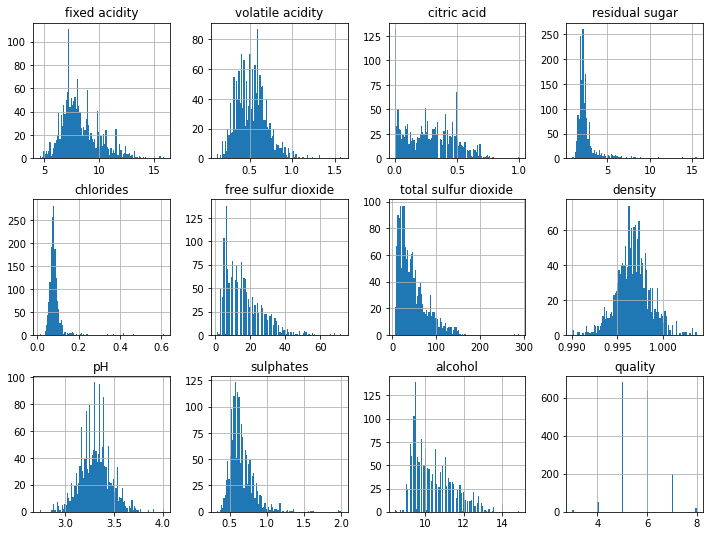

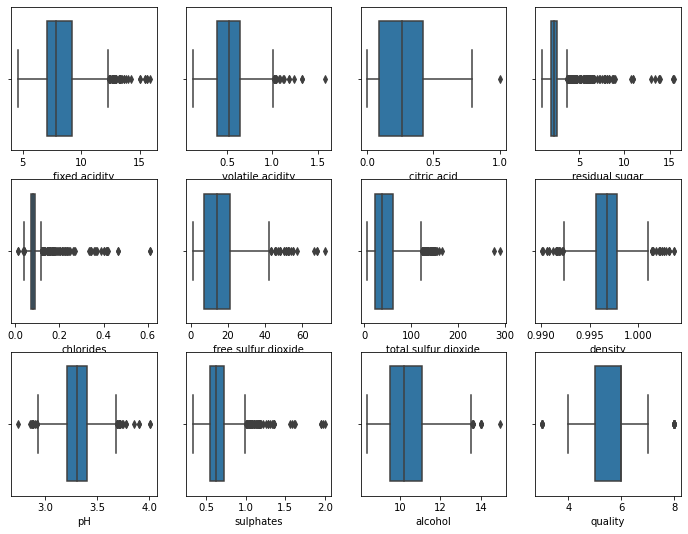

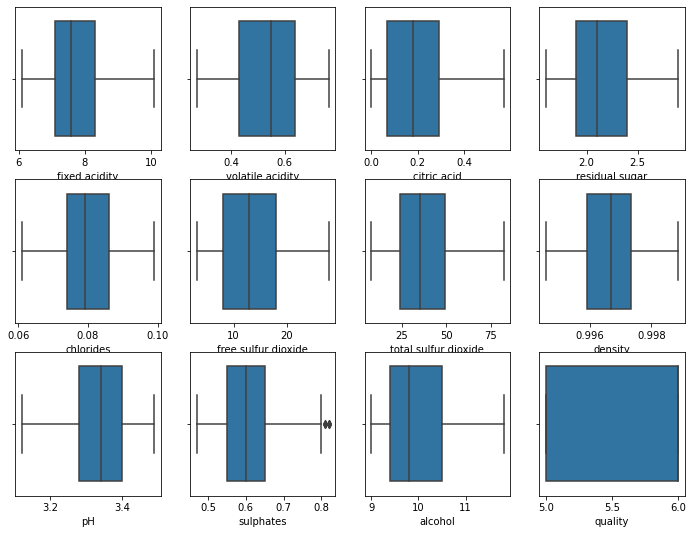

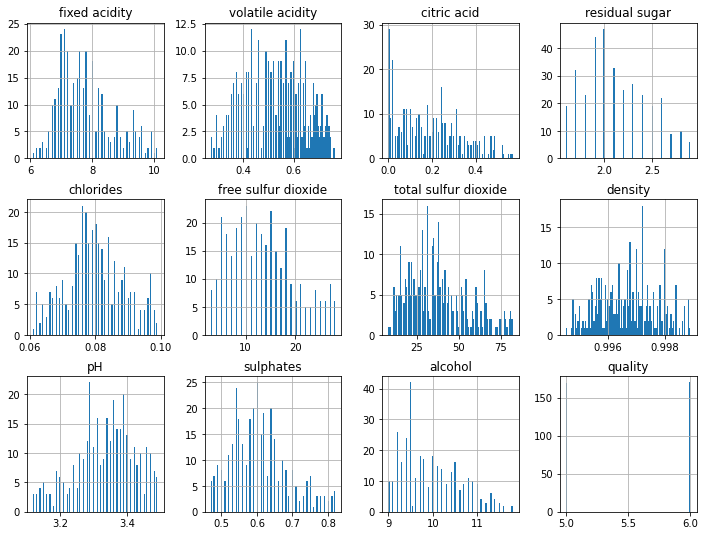

In [10]:
red_wine=pd.read_csv(path_to_red_wine, sep=';')
quality_check(red_wine)

## Quality check white wine

No null values in the dataset.
                      Missing Values
fixed acidity                      0
volatile acidity                   0
citric acid                        0
residual sugar                     0
chlorides                          0
free sulfur dioxide                0
total sulfur dioxide               0
density                            0
pH                                 0
sulphates                          0
alcohol                            0
quality                            0
Plot distribution of data
Plot boxplots for observing outliers
Removing outliers...
Plot boxplots for checking absence of outliers
Checking distribution of features after removal of features.


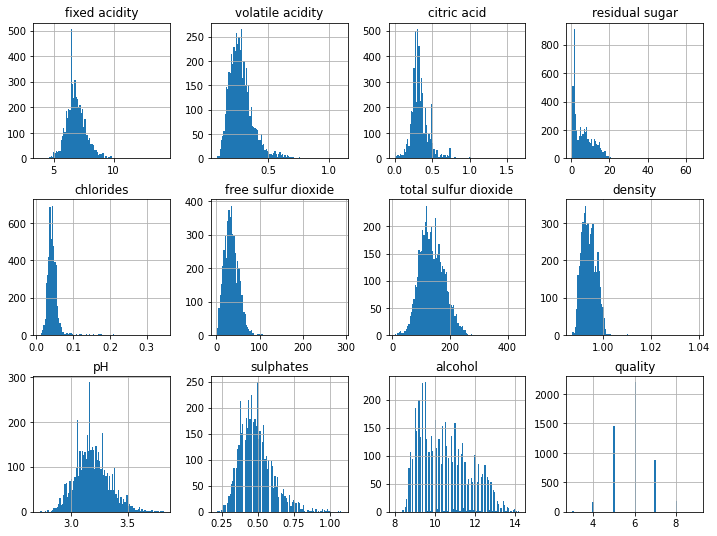

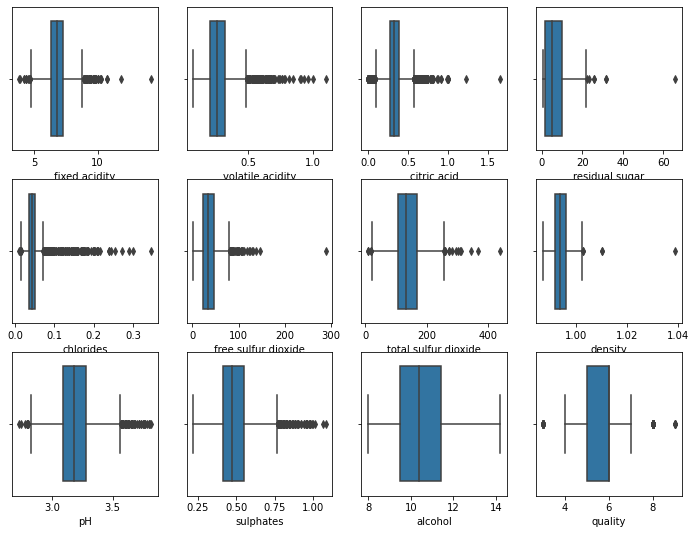

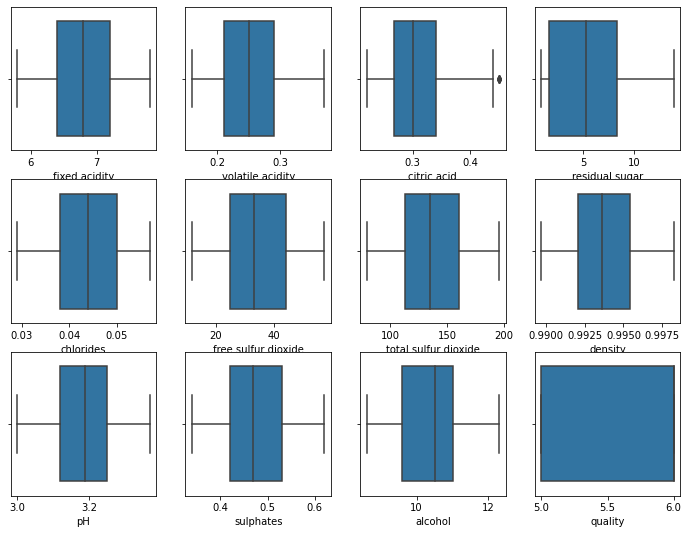

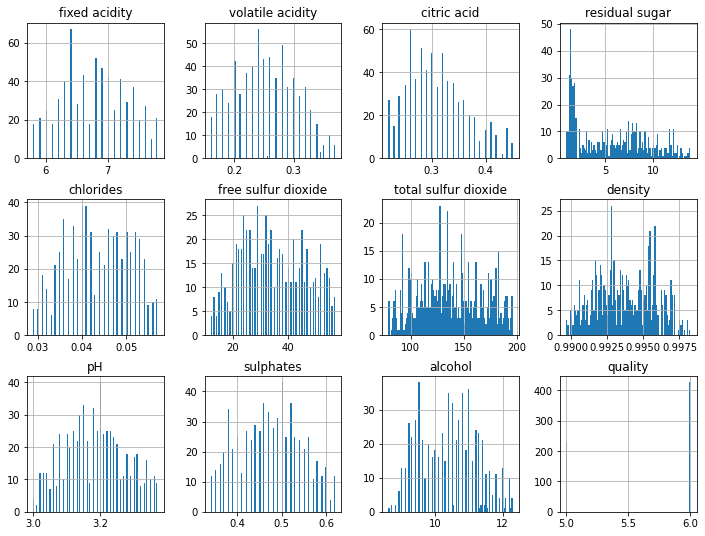

In [11]:
white_wine=pd.read_csv(path_to_white_wine, sep=';')
quality_check(white_wine)

We observe that in bot red_wine and white_wine removing outliers change drastically the distribution of the quality feature.

## Apply all methods

In [12]:
def apply_all_methods(methods,data, frac):
    features=data.columns[:-1]
    label=data.columns[-1]
    #split data
    print(f'Split {round(frac*100,2)}% train, {round((1-frac)*100,2)}%')
    data_train=data.sample(frac=frac)
    data_test=data[~data.isin(data_train)].dropna()
    X_train=data_train[features].to_numpy()
    X_test=data_test[features].to_numpy()
    y_train=data_train[label].to_numpy()
    y_test=data_test[label].to_numpy()
    print(f'Shape train:{data_train.shape}. Ratio:{round(data_train.shape[0]/data.shape[0],2)}')
    print(f'Shape test:{data_test.shape}. Ratio:{round(data_test.shape[0]/data.shape[0],2)}')
    
    for method in methods:
        method(X_train,y_train,X_test,y_test)

## Apply methods to datasets

In [13]:
def apply_methods_to_datasets(datasets, methods, frac):
    for dataset in datasets:
        print(f'DATASET: {dataset["name"]}')
        apply_all_methods(methods, dataset["data"], frac)
        print("\n")

In [14]:
datasets=[{"name":"Red Wine", "data":red_wine}, {"name":"White Wine", "data":white_wine}]
apply_methods_to_datasets(datasets, [random_forest, logistic_regression, linear_regression], 0.7)

DATASET: Red Wine
Split 70.0% train, 30.0%
Shape train:(1119, 12). Ratio:0.7
Shape test:(480, 12). Ratio:0.3
----------------RANDOM FOREST---------------
accuracy: 0.58
----------------LOGISTIC REGRESSION---------------


C:\Users\stefa\anaconda3\envs\ada\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.55
----------------LINEAR REGRESSION---------------
coefficient:[ 0.00753081 -1.11274793 -0.14999708  0.00222343 -1.56669252  0.00534387
 -0.00387105  0.2406209  -0.36952878  0.9028669   0.27886215]
intercept:3.9091311478102893
accuracy: 0.42


DATASET: White Wine
Split 70.0% train, 30.0%
Shape train:(3429, 12). Ratio:0.7
Shape test:(1469, 12). Ratio:0.3
----------------RANDOM FOREST---------------
accuracy: 0.67
----------------LOGISTIC REGRESSION---------------
accuracy: 0.76
----------------LINEAR REGRESSION---------------
coefficient:[ 1.19088779e-01 -1.82706534e+00  4.34797787e-02  1.09247144e-01
 -2.67156812e-01  3.45029846e-03  2.62044122e-05 -2.30311654e+02
  9.90336630e-01  7.17998198e-01  1.00272632e-01]
intercept:229.1198396608171
accuracy: 0.57




C:\Users\stefa\anaconda3\envs\ada\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
